<a href="https://colab.research.google.com/github/lima-breno/natural_language_processing/blob/main/Representa%C3%A7%C3%A3o_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Representação vetorial

Nesta seção, abordaremos três técnicas populares de representação de texto em Processamento de Linguagem Natural (NLP): Bag of Words, TF-IDF e Embeddings.

## Bag of Words (BoW)

Bag of Words é uma técnica simples de representação de texto onde cada documento é representado como uma contagem de palavras. Não leva em consideração a ordem das palavras, apenas a frequência de ocorrência.

## TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF é uma técnica que ajusta a frequência das palavras em um documento com base na frequência inversa do documento em um corpus. Isso ajuda a reduzir a importância de palavras comuns e aumentar a importância de palavras raras.

## Embeddings
Embeddings são representações vetoriais densas de palavras ou frases em um espaço de alta dimensionalidade. Eles capturam o significado semântico das palavras, permitindo que palavras com significados semelhantes tenham representações vetoriais próximas.

In [ ]:
!pip install nltk==3.5
!pip install wikipedia
!pip install unidecode
!pip install gensim==4.3.0

In [ ]:
import nltk
from unidecode import unidecode
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import gensim
import warnings
import numpy as np
import string
import re
from gensim.models import word2vec
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
nltk.download('punkt')
nltk.download('stopwords')

import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Definição do Corpus
Usaremos algumas frases do corpus de BH da wikipedia.
Conside a lista abaixo como nosso corpus de documentos. Cada elemento da lista, considere como um único documento.

In [ ]:
documentos = \
["Belo Horizonte é um município brasileiro e a capital do estado de Minas Gerais",
"A populacao de Belo Horizonte é estimada em 2 501 576 habitantes, conforme estimativas do Instituto Brasileiro de Geografia e Estatística",
"Belo Horizonte já foi indicada pelo Population Crisis Commitee, da ONU, como a metrópole com melhor qualidade de vida na América Latina",
"Belo Horizonte é mundialmente conhecida e exerce significativa influência nacional e até internacional, seja do ponto de vista cultural, econômico ou político",
"Belo Horizonte é a capital do segundo estado mais populoso do Brasil, Minas Gerais"]

## Preprocessamento

<b> Atividade </b>

1) Escreva uma método que realiza o pré-processamento da lista de <b>documentos</b>.

O método deve, para cada documento:
- tokenizar cada palavra
- remover stopwords
- remover números
- remover pontuções
- remover acentos

In [ ]:
from nltk.probability import FreqDist
def plot_frequencia_tokens(tokens):
    fd_words = FreqDist(tokens)
    fd_words.plot(20)

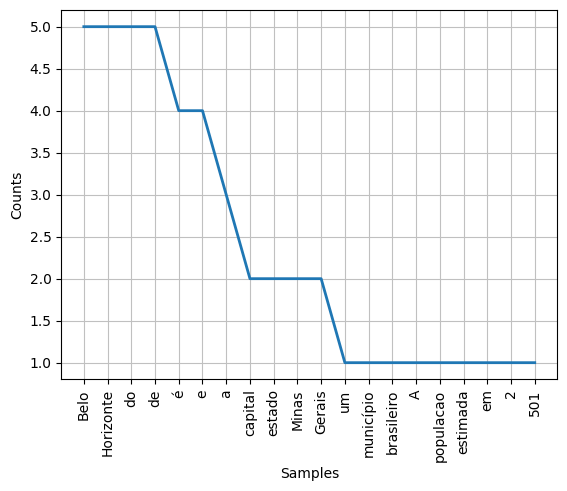

In [ ]:
tokens = []
for doc in documentos:
  tokens.extend(doc.split(' '))
plot_frequencia_tokens(tokens)

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')

def pre_processamento(texto):
  tokens = texto.split(' ')
  tokens = [token for token in tokens if token not in stopwords]
  tokens = [re.sub(r'\d', '', t) for t in tokens]
  tokens = [t for t in tokens if t not in string.punctuation]
  tokens = [unidecode(t) for t in tokens]
  return ' '.join(tokens)

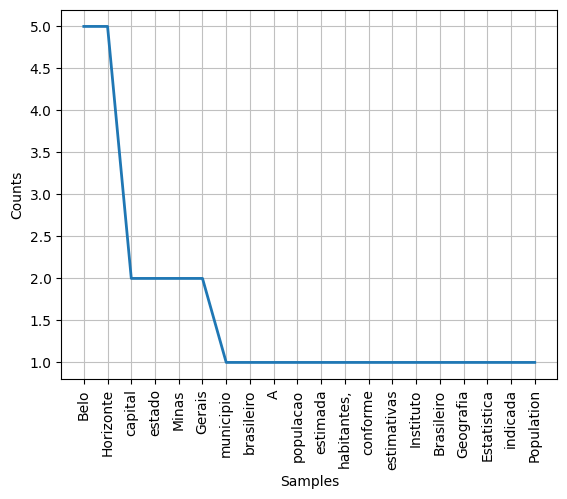

In [ ]:
documentos = [pre_processamento(doc) for doc in documentos]
tokens = []
for doc in documentos:
  tokens.extend(doc.split(' '))
plot_frequencia_tokens(tokens)

## N-grans

N-grams são sequências contínuas de N itens (geralmente palavras ou caracteres) extraídas de um texto. Eles são amplamente utilizados em Processamento de Linguagem Natural (NLP) para modelar a probabilidade de uma sequência de palavras e para capturar a estrutura local do texto.

### Tipos de N-grams

1. **Unigram**: N-grama de 1 item (palavra única).
2. **Bigram**: N-grama de 2 itens (sequência de duas palavras).
3. **Trigram**: N-grama de 3 itens (sequência de três palavras).
4. **N-gram**: N-grama de N itens (sequência de N palavras).

### Exemplo de N-grams

Vamos considerar a frase: "Eu amo programação em Python".

- **Unigrams**: ["Eu", "amo", "programação", "em", "Python"]
- **Bigrams**: ["Eu amo", "amo programação", "programação em", "em Python"]
- **Trigrams**: ["Eu amo programação", "amo programação em", "programação em Python"]

### Utilização de N-grams

N-grams são utilizados em várias aplicações de NLP, incluindo:

1. **Modelagem de Linguagem**: Para prever a próxima palavra em uma sequência.
2. **Análise de Texto**: Para extrair padrões e características do texto.
3. **Classificação de Texto**: Para criar recursos para modelos de aprendizado de máquina.
4. **Correção Ortográfica**: Para sugerir correções baseadas em contextos comuns.

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(documentos)

print(vectorizer.get_feature_names_out())

['america latina' 'belo horizonte' 'brasil minas' 'brasileiro capital'
 'brasileiro geografia' 'capital estado' 'capital segundo' 'commitee onu'
 'conforme estimativas' 'conhecida exerce' 'crisis commitee'
 'cultural economico' 'economico politico' 'estado minas'
 'estado populoso' 'estimada habitantes' 'estimativas instituto'
 'exerce significativa' 'geografia estatistica' 'habitantes conforme'
 'horizonte capital' 'horizonte estimada' 'horizonte indicada'
 'horizonte mundialmente' 'horizonte municipio' 'indicada population'
 'influencia nacional' 'instituto brasileiro' 'internacional ponto'
 'melhor qualidade' 'metropole melhor' 'minas gerais'
 'mundialmente conhecida' 'municipio brasileiro' 'nacional internacional'
 'onu metropole' 'ponto vista' 'populacao belo' 'population crisis'
 'populoso brasil' 'qualidade vida' 'segundo estado'
 'significativa influencia' 'vida america' 'vista cultural']


## TD-IDF
Dica de leitura: [TF-IDF Transformer vs. TF-IDF Vectorizer](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.XklQxnVKj7c)

Para representar o texto com TF-IDF, utilizamos o `TfidfVectorizer` da biblioteca `sklearn`. A seguir, apresentamos instruções sobre como utilizá-lo.

### Passos para Utilizar o TF-IDF


1. **Criar o Objeto `TfidfVectorizer`**:
   Primeiro, criamos o objeto `TfidfVectorizer`.

   ```python
   from sklearn.feature_extraction.text import TfidfVectorizer

   vect = TfidfVectorizer()
   print(vect)  # Aqui você pode observar todos os parâmetros que o objeto possui
   ```

2. **Configurar Parâmetros Opcionais**:
    Existem alguns parâmetros opcionais que podemos configurar para melhorar o nosso modelo. Por exemplo:

    * **Incluir 1-grams e 2-grams**:
    ```python
    vect.set_params(ngram_range=(1, 2))
    ```

    * **Ignorar termos que aparecem em mais de 50% dos documentos**:
    ```python
    vect.set_params(max_df=0.5)
    ```

    * **Considerar apenas termos que aparecem em pelo menos 2 documentos**:
    ```python
    vect.set_params(min_df=2)
    ```

 3. **Transformar o Texto em Números**:
 Aplicamos o método fit_transform para transformar o texto em números.

```python
docs_tdidf = vect.fit_transform(docs)
```

4. **Verificar a Dimensão da Matriz**:

O docs_tfidf é uma matriz esparsa que representa cada um dos textos. Podemos verificar a dimensão desta matriz:

```python
print(docs_tfidf.shape)
```

5. **Visualizar as Features Capturadas pelo TF-IDF**:
Para visualizar as features capturadas pelo TF-IDF, utilizamos:

```python
print(vect.get_feature_names_out())
```

6. **Visualizar os Vetores Correspondentes a Cada Palavra**:
Para visualizar os vetores correspondentes a cada palavra, podemos criar um DataFrame:

```python
import pandas as pd

df = pd.DataFrame(docs_tfidf.T.todense(), index=vect.get_feature_names_out(), columns=["doc"+str(i+1) for i in range(len(docs))])
print(df)
```

**Atividade:**

2) Faça o TDIFTVectorizer nos documentos da variável <b>documentos</b> sem alterar nenhum parâmetro.

3) Imprima o shape do resultado da atividade 2

4) Imprima as features capturadas em 2

5) Imprima os vetores correspondentes a cada palavra de cada documento.

In [ ]:
vect = TfidfVectorizer()
docs_tfidf = vect.fit_transform(documentos)
print(docs_tfidf.shape)
print(vect.get_feature_names_out())
df = pd.DataFrame(docs_tfidf.T.todense(),
                  index=vect.get_feature_names_out(),
                  columns=["doc"+str(i+1) for i in range(len(documentos))])
print(df)

(5, 42)
['america' 'belo' 'brasil' 'brasileiro' 'capital' 'commitee' 'conforme'
 'conhecida' 'crisis' 'cultural' 'economico' 'estado' 'estatistica'
 'estimada' 'estimativas' 'exerce' 'geografia' 'gerais' 'habitantes'
 'horizonte' 'indicada' 'influencia' 'instituto' 'internacional' 'latina'
 'melhor' 'metropole' 'minas' 'mundialmente' 'municipio' 'nacional' 'onu'
 'politico' 'ponto' 'populacao' 'population' 'populoso' 'qualidade'
 'segundo' 'significativa' 'vida' 'vista']
                   doc1      doc2      doc3      doc4      doc5
america        0.000000  0.000000  0.295474  0.000000  0.000000
belo           0.219592  0.157916  0.140795  0.135024  0.193603
brasil         0.000000  0.000000  0.000000  0.000000  0.406297
brasileiro     0.371802  0.267376  0.000000  0.000000  0.000000
capital        0.371802  0.000000  0.000000  0.000000  0.327798
commitee       0.000000  0.000000  0.295474  0.000000  0.000000
conforme       0.000000  0.331405  0.000000  0.000000  0.000000
conhecida   

In [ ]:
documentos[4]

'Belo Horizonte capital segundo estado populoso Brasil, Minas Gerais'

## Bag of Words


Para representar o texto utilizando a técnica Bag of Words, utilizamos a classe `CountVectorizer` da biblioteca `sklearn`.

### Exemplo de Uso

```python
from sklearn.feature_extraction.text import CountVectorizer

# Primeiro, criamos o objeto CountVectorizer
vect_bag = CountVectorizer(binary=False)  # Se binary=False, ocorre a contagem da frequência em que a palavra aparece
print(vect_bag)  # Imprime os parâmetros do objeto

```

<b> Atividade </b>

7) Faça o CountVectorizer nos documentos da variável <b>documentos</b> considerando binary = True

8) Imprima o índice correspondente a cada token da lista retornada por vect_bag.get_feature_names()

In [ ]:
vect_bag = CountVectorizer(binary=True)
docs_bag = vect_bag.fit_transform(documentos)
print(docs_bag.shape)
print(vect_bag.get_feature_names_out())
df = pd.DataFrame(docs_bag.T.todense(),
                  index=vect_bag.get_feature_names_out(),
                  columns=["doc"+str(i+1) for i in range(len(documentos))])
print(df)

(5, 42)
['america' 'belo' 'brasil' 'brasileiro' 'capital' 'commitee' 'conforme'
 'conhecida' 'crisis' 'cultural' 'economico' 'estado' 'estatistica'
 'estimada' 'estimativas' 'exerce' 'geografia' 'gerais' 'habitantes'
 'horizonte' 'indicada' 'influencia' 'instituto' 'internacional' 'latina'
 'melhor' 'metropole' 'minas' 'mundialmente' 'municipio' 'nacional' 'onu'
 'politico' 'ponto' 'populacao' 'population' 'populoso' 'qualidade'
 'segundo' 'significativa' 'vida' 'vista']
               doc1  doc2  doc3  doc4  doc5
america           0     0     1     0     0
belo              1     1     1     1     1
brasil            0     0     0     0     1
brasileiro        1     1     0     0     0
capital           1     0     0     0     1
commitee          0     0     1     0     0
conforme          0     1     0     0     0
conhecida         0     0     0     1     0
crisis            0     0     1     0     0
cultural          0     0     0     1     0
economico         0     0     0     1   

## Embedding

### Utilizando um embedding treinado

9) Faça download do seguinte arquivo, realize a leitura deste arquivo e carregue o modelo:
[Download Embedding](https://drive.google.com/file/d/1-l_iWjXtSAqUksEf2veepNj_v_lQK2Fd/view?usp=sharing)


Depois suba no seu drive e carregue,

obs.: como o embedding é pesado, demora um pouco para carregar, cerca de 4 minutos.

In [ ]:
import gensim
from gensim.models import word2vec

In [ ]:
#opção 1 -> montar o drive no colab e acessar o arquivo de embedding do drive
from google.colab import drive
drive.mount('/content/drive')

#opção 2 -> fazer download e fazer upload por aqui
#from google.colab import files
#uploaded = files.upload()

Mounted at /content/drive


In [ ]:
path='drive/MyDrive/aulas/Processamento de Linguagem Natural/ptwiki_20180420_100d.txt.bz2'
word_vectors = gensim.models.KeyedVectors.load_word2vec_format(path, binary=False)

**Obtendo a representação**

Para visualizar a representação vetorial de palavras específicas, podemos utilizar o modelo de embeddings carregado.

```python
#exemplo de retorno do vetor
word_vectors[__]
```

10. Imprima os vetores das palavras "nlp" e "computacao"

<b> Similaridade de Vetores </b>

No `gensim`, é possível calcular a similaridade entre palavras utilizando o método `most_similar`. Este método retorna as palavras mais semelhantes a uma palavra ou conjunto de palavras fornecidas.

```python
word_vectors.most_similar(___)
```

11. Verifique a similaridade das seguintes palavras: elizabete, raiva, segunda, dois, computação.


Além de encontrar palavras semelhantes, podemos calcular a similaridade entre duas palavras específicas utilizando o método `similarity` do `gensim`.

```python
similarity_score = model.similarity('nlp', 'computacao')
print("Similaridade entre 'nlp' e 'computacao':", similarity_score)
```

12. Verifique a similaridade das seguintes das palavras:
* filho e filha
* rei e rainha
* hoje e dia

<b> Operação Vetorial</b>

Além de calcular similaridades, podemos realizar operações vetoriais para encontrar relações semânticas entre palavras. A operação vetorial positive=['mulher', 'rei'], negative=['homem'] busca encontrar uma palavra que tenha a mesma relação com "mulher" que "rei" tem com "homem".

```python
#exemplo:
word_vectors.most_similar(positive=['mulher', 'rei'], negative=['homem'], topn=10)
```

13. Execute o exemplo acima em uma célula e repita para os seguintes cenários:

- Positivo: menino, menina Negativo: homem.
- Positivo: caminhada, andar, Negativo: correr
- Positivo: filho, filha Negativo: irmã
- Positivo: pai, mãe, Negativo: avô

In [ ]:
word_vectors['nlp']

array([ 0.8528,  0.1094, -0.0296, -0.0458, -0.2029, -0.1839, -0.2012,
       -0.111 , -0.0315,  0.1895, -0.2194, -0.3496, -0.1319, -0.1594,
        0.1549, -0.493 ,  0.1897, -0.296 ,  0.0026,  0.2015,  0.0215,
        0.2946, -0.2024,  0.3931,  0.143 ,  0.0667, -0.4868,  0.048 ,
       -0.1028,  0.2372,  0.2042, -0.8025, -0.1221,  0.475 , -0.2997,
        0.219 ,  0.1232, -0.2118,  0.5402, -0.0768,  0.2253,  0.1285,
       -0.6157,  0.1777,  0.0306, -0.1094, -0.1649, -0.386 , -0.2692,
        0.3149,  0.0391, -0.0821, -0.2238,  0.033 ,  0.5032,  0.0836,
        0.1834, -0.2009, -0.0722, -0.1744,  0.3946, -0.0792, -0.0863,
        0.3813,  0.5876, -0.4447, -0.5435,  0.1528, -0.1012, -0.0967,
       -0.2621,  0.4737,  0.3235, -1.1013, -0.0789,  0.1945, -0.1304,
       -0.0379,  0.899 ,  0.0398,  0.2908, -0.4276, -0.0641, -0.3841,
        0.354 ,  0.4139,  0.1076, -0.3439, -0.1474, -0.1215,  0.4359,
       -0.1563,  0.2577,  0.4333,  0.2003, -0.4064, -0.818 ,  0.0812,
       -0.2554, -0.4

In [ ]:
word_vectors.most_similar('raiva')

[('medo', 0.8303433060646057),
 ('frustração', 0.8079832196235657),
 ('desespero', 0.8039345145225525),
 ('tristeza', 0.800615668296814),
 ('remorso', 0.7922822833061218),
 ('desgosto', 0.7901228070259094),
 ('inveja', 0.781806468963623),
 ('ciúmes', 0.7798184156417847),
 ('ódio', 0.7763742208480835),
 ('repugnância', 0.765758216381073)]

In [ ]:
word_vectors.most_similar('segunda')

[('primeira', 0.8965904116630554),
 ('quarta', 0.8717238903045654),
 ('terceira', 0.8408156633377075),
 ('última', 0.8141332268714905),
 ('sétima', 0.8071783185005188),
 ('sexta', 0.7998778820037842),
 ('décima', 0.7983245849609375),
 ('penúltima', 0.771909236907959),
 ('nona', 0.7675511837005615),
 ('oitava', 0.767022430896759)]

In [ ]:
word_vectors.most_similar('dois')

[('três', 0.8804982900619507),
 ('quatro', 0.8787742257118225),
 ('seis', 0.844917893409729),
 ('cinco', 0.8440984487533569),
 ('oito', 0.8346582055091858),
 ('ambos', 0.8209627866744995),
 ('nove', 0.8060351014137268),
 ('vários', 0.80522620677948),
 ('os', 0.8016588091850281),
 ('sete', 0.7854639887809753)]

In [ ]:
word_vectors.most_similar('computação')

[('computacional', 0.8587305545806885),
 ('informática', 0.8066875338554382),
 ('microeletrônica', 0.790315568447113),
 ('bioinspirada', 0.7866969704627991),
 ('computacionais', 0.7839763760566711),
 ('biomatemática', 0.7749572992324829),
 ('ubicomp', 0.7651090025901794),
 ('lamce', 0.7647029757499695),
 ('imecc', 0.7626294493675232),
 ('bioinformática', 0.7598605155944824)]

In [ ]:
print(f'Similaridade entre "filho" e "filha": {word_vectors.similarity("filho", "filha")}')
print(f'Similaridade entre "rei" e "rainha": {word_vectors.similarity("rei", "rainha")}')
print(f'Similaridade entre "hoje" e "dia": {word_vectors.similarity("hoje", "dia")}')

Similaridade entre "filho" e "filha": 0.8251537084579468
Similaridade entre "rei" e "rainha": 0.7319667339324951
Similaridade entre "hoje" e "dia": 0.4596257507801056


In [ ]:
word_vectors.most_similar(positive=['pai', 'avó'], negative='mãe')

[('avô', 0.9453103542327881),
 ('tio', 0.9200181365013123),
 ('sogro', 0.870943009853363),
 ('bisavô', 0.8668490052223206),
 ('sobrinho', 0.8538035750389099),
 ('irmão', 0.8535856008529663),
 ('filho', 0.8461479544639587),
 ('marido', 0.8350286483764648),
 ('padrasto', 0.8302208185195923),
 ('adotivo', 0.8047031760215759)]

### Treinando seu embedding

Aqui vamos utilizar o corpus machado. São textos/contos escritos por Machado de Assis.
Esse corpus é diponibilizado pelo NLTK.

In [ ]:
from nltk.corpus import machado

In [ ]:
import nltk
from nltk.corpus import machado
nltk.download('machado')

[nltk_data] Downloading package machado to /root/nltk_data...


True

In [ ]:
raw_casmurro = machado.raw('contos/macn001.txt')

O método ''machado_sents()'' retorna todo o texto quebrado pelas setenças e já tokenizado.

As sentenças são separadas pelo "\n". Dentro de cada sentença, divide os tokens separadas pelo espaço.

In [ ]:
machado_sents = machado.sents()
print(machado_sents)

[['Conto', ',', 'Contos', 'Fluminenses', ',', '1870'], ['Contos', 'Fluminenses'], ...]


In [ ]:
len(machado_sents)

200559

Vamos relizar um pré-processamento mínimo nos dados. Lembrando que: o pré-processamento é impotatíssimo no resultado final.

<b> Atividade </b>

14) Aplique as técnicas abaixo no documento <b> machado_sents</b>:

- lower
- remoção pontuações

In [ ]:
import string

In [ ]:
machado_sents_processado = []
for sent in machado_sents:
  list_tmp = []
  for token in sent:
    if token not in string.punctuation:
      list_tmp.append(token.lower())
  machado_sents_processado.append(list_tmp)

In [ ]:
machado_sents = [[token.lower() for token in sent if token not in string.punctuation] for sent in machado_sents]

In [ ]:
len(machado_sents)

200559

<b> Treinando o embedding </b>

Para treinar embeddings, existem vários parâmetros que podem ser ajustados. Veja o exemplo abaixo:

* vector_size: Define a dimensão dos vetores de palavras.
* min_count: Ignora todas as palavras cuja frequência mínima é menor que este valor.
*  workers: Número de threads a serem utilizadas para treinar o modelo.
* seed: Semente para geração do número aleatório, garantindo reprodutibilidade.
* sg: Define o algoritmo de treinamento; 1 para skip-gram e 0 para CBOW.
* window: Define o contexto, ou seja, a distância máxima entre a palavra atual e a prevista em uma frase.


```python
model = word2vec.Word2Vec(text_preproc, min_count=10, workers=4, seed=123, sg=1, vector_size=300, window=5)
```

<b> Atividade </b>

15. Gere os embeddings com o texto processado do documento de Machado de Assis.

16. Faça os itens abaixo:

- Verifique o vetor de embeddings da variável "dom"
- Verifique a similaridade entre "mulher" e "homem"
- Verifique a similaridade entre "dom" e "casmurro"


In [ ]:
model = word2vec.Word2Vec(machado_sents, min_count=10, workers=4, seed=123, sg=1, vector_size=100, window=5)

In [ ]:
model.wv.similarity('mulher', 'homem')

0.54991746

In [ ]:
model.wv.similarity('dom', 'casmurro')

0.6856803

### Visualização

<b> Atividade </b>

Dada as seguintes palavras:

foi, relógio, amor, raiva, brasil.

17) Escreva um método que retorne uma lista com as 5 palavras similares de cada uma das listadas anteriormente.
Imprima a lista das palavras similares, incluindo a palavra origem.

Para a visualização dos embeddings iremos  construir um array com todas as palavras retornadas anteriormente.

18) Primeiro, gere uma única lista com todas as palavras retornadas anteriomente. O array deve ter tamanho 30.

19) Gere um array com todos os embeddings das palavras anteriores. Este terá dimensão (30,300)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
def similares(palavra, modelo):
  similar = modelo.wv.most_similar(palavra, topn=5)
  similar = [palavra] + [s[0] for s in similar]
  return similar

words_similar = []
words_seed = ['foi', 'relógio', 'amor', 'raiva', 'brasil']
for word in words_seed:
  words_similar.extend(similares(word, model))

vector_words = np.array([model.wv[word] for word in words_similar])

In [ ]:
words_similar

['foi',
 'passou',
 'fui',
 'veio',
 'seguiu',
 'serviu',
 'relógio',
 'paletó',
 'embrulho',
 'sapato',
 'revólver',
 'gamão',
 'amor',
 'ciúme',
 'orgulho',
 'arrependimento',
 'casto',
 'afeto',
 'raiva',
 'assobiar',
 'mordia',
 'morder',
 'amargura',
 'impaciência',
 'brasil',
 'méxico',
 'município',
 'parlamento',
 'sul',
 'cruzeiro']

In [ ]:
vector_words.shape

(30, 100)

<b>Dica: </b> Use a função abaixo para plotar o array 2D que será gerado com o método PCA, TSNE e UMAP

In [ ]:
def plot_embedding_2d(array_2d, all_words, words_seed):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    for (x, y), w in zip(array_2d, all_words):
        ax.scatter(x, y, c='red' if w in words_seed else 'blue')
        ax.annotate(w,
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

#### PCA

<b> É uma ténica que existe a mais de século. É rápido, determinístico e linear. Essa linearidade limita sua utilidade em domínios complexos, como linguagem natural ou imagens, onde a estrutura não linear. </b>

Mais informações: https://medium.com/towards-artificial-intelligence/machine-learning-dimensionality-reduction-via-principal-component-analysis-1bdc77462831


<b> Atividade </b>

20) Gere a visualização dos embeddings anteriores utilizando o PCA para reduzir a dimensionalidade.

Exemplo do PCA:

```python
#uso de PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(array_embeddings)
```

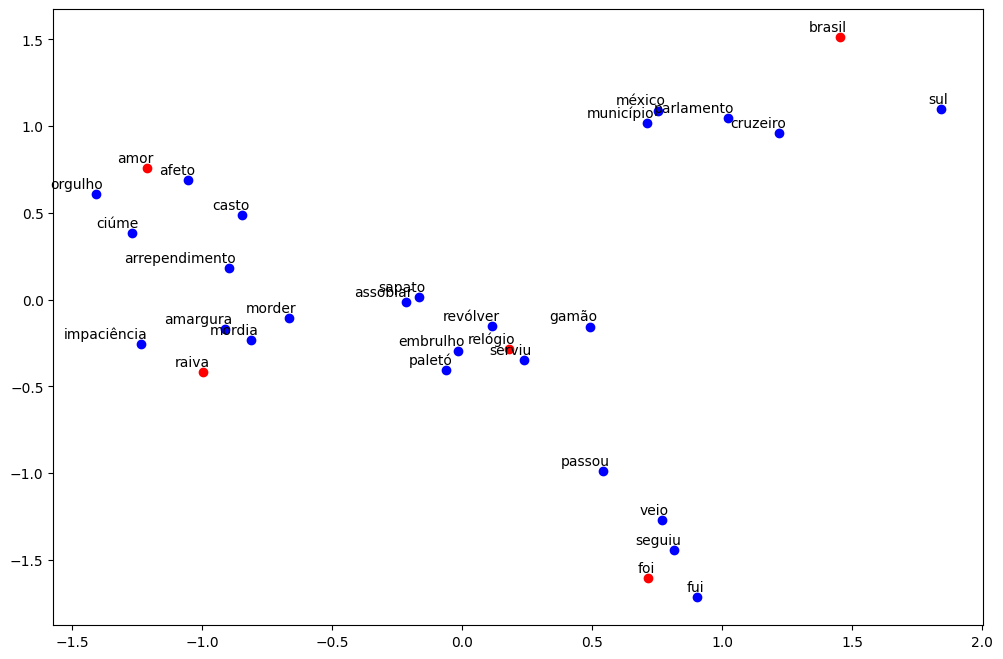

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vector_words)

plot_embedding_2d(pca_result, words_similar, words_seed)